# Analyzing the California Homekey Program

In [6]:
#Loading libraries 
library(dplyr)
library(tidyverse)
library(tigris) #places

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


I created the CSV below by manually extracting the data from the award list pdf of round 2 Homekey Awards. I found this data on the archive page of the California Department of Housing and Community Development website.

The URL is provided here:
https://www.hcd.ca.gov/sites/default/files/docs/grants-and-funding/homekey/homekey-round-2-awards.pdf

In [487]:
Homekey_awards2=read.csv("Homekey_awards2.csv")


# Visualizing the Distribution of Round 2 Homekey Awards
##  Questions driving exploration:
    - Were Awards distributed to counties based on most need? 
    - Which regions received the most amount of funding, which regions received the least?

In [490]:
#Accessing county map data using tigris
counties <- counties(state = "CA", cb = TRUE)
counties |> 
select(NAMELSAD,geometry)

Retrieving data for the year 2022




 |======================================================================| 100%

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

NAMELSAD               geometry                      
10   Los Angeles County     MULTIPOLYGON (((-118.6044 3...
11   Sonoma County          MULTIPOLYGON (((-123.5335 3...
12   Alameda County         MULTIPOLYGON (((-122.3423 3...
13   Mendocino County       MULTIPOLYGON (((-124.0233 4...
14   Del Norte County       MULTIPOLYGON (((-124.2175 4...
18   Napa County            MULTIPOLYGON (((-122.6466 3...
151  Plumas County          MULTIPOLYGON (((-121.497 40...
152  Sutter County          MULTIPOLYGON (((-121.9483 3...
153  Glenn County           MULTIPOLYGON (((-122.938 39...
303  Amador County          MULTIPOLYGON (((-121.0274 3...
304  Shasta County          MULTIPOLYGON (((-123.0688 4...
333  Santa Barbara County   MULTIPOLYGON (((-119.047 33...
334  Ventura County         MULTIPOLYGON (((-119.3745 3...
335  Imperial County        MULTIPOLYGON (((-116.1063 3...
336  Riverside County       MULTIPOLYGON (((-117.6767 3...
337  Mono County            MULTIPOLYGON (((-119.6489 3...
338  Humboldt County        MULTIPOLYGON (((-124.4086 4...
339  Siskiyou County        MULTIPOLYGON (((-123.7184 4...
557  Madera County          MULTIPOLYGON (((-120.5455 3...
558  Merced County          MULTIPOLYGON (((-121.2485 3...
559  Tehama County          MULTIPOLYGON (((-123.0654 4...
560  Yuba County            MULTIPOLYGON (((-121.6363 3...
561  Mariposa County        MULTIPOLYGON (((-120.3944 3...
785  San Diego County       MULTIPOLYGON (((-117.596 33...
786  San Mateo County       MULTIPOLYGON (((-122.5209 3...
787  Sierra County          MULTIPOLYGON (((-121.0575 3...
788  El Dorado County       MULTIPOLYGON (((-121.1416 3...
789  Butte County           MULTIPOLYGON (((-122.0687 3...
791  Tuolumne County        MULTIPOLYGON (((-120.6532 3...
835  Colusa County          MULTIPOLYGON (((-122.7851 3...
927  Orange County          MULTIPOLYGON (((-118.1146 3...
928  Marin County           MULTIPOLYGON (((-122.4463 3...
929  Santa Clara County     MULTIPOLYGON (((-122.2027 3...
930  San Joaquin County     MULTIPOLYGON (((-121.5847 3...
931  Fresno County          MULTIPOLYGON (((-120.9094 3...
975  Monterey County        MULTIPOLYGON (((-121.9766 3...
1079 Contra Costa County    MULTIPOLYGON (((-122.4298 3...
1125 Lake County            MULTIPOLYGON (((-123.0942 3...
1183 San Luis Obispo County MULTIPOLYGON (((-121.3464 3...
1184 Nevada County          MULTIPOLYGON (((-121.2797 3...
1243 Santa Cruz County      MULTIPOLYGON (((-122.3177 3...
1323 Tulare County          MULTIPOLYGON (((-119.5665 3...
1337 Yolo County            MULTIPOLYGON (((-122.4215 3...
1360 San Benito County      MULTIPOLYGON (((-121.644 36...
1363 Calaveras County       MULTIPOLYGON (((-120.9936 3...
1389 Solano County          MULTIPOLYGON (((-122.4035 3...
1399 Stanislaus County      MULTIPOLYGON (((-121.4868 3...
1595 San Francisco County   MULTIPOLYGON (((-122.3316 3...
1596 Inyo County            MULTIPOLYGON (((-118.79 37....
1597 Placer County          MULTIPOLYGON (((-121.4844 3...
1610 Lassen County          MULTIPOLYGON (((-121.3319 4...
1611 Kern County            MULTIPOLYGON (((-120.1944 3...
1872 Trinity County         MULTIPOLYGON (((-123.6224 4...
2271 Kings County           MULTIPOLYGON (((-120.3151 3...
2296 Sacramento County      MULTIPOLYGON (((-121.8625 3...
2805 San Bernardino County  MULTIPOLYGON (((-117.8025 3...
2806 Alpine County          MULTIPOLYGON (((-120.0724 3...
2807 Modoc County           MULTIPOLYGON (((-121.4572 4...

In [22]:
cities<- places(state= "CA", cb=TRUE)

Retrieving data for the year 2022



## Standardizing and Cleaning the Homekey Award data 
#### The Homekey Award Data has both city level and county level data, to standardize the data set I will be using the merged city and county data from tigris 

In [26]:
install.packages("sf")

Installing package into ‘/Users/yasnarahmani/Library/R/arm64/4.4/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/vj/5tw7c0jn7q7fh1p2sp9gn65m0000gn/T//Rtmpxau0kO/downloaded_packages


In [29]:
library(sf)
cities=st_read(cities)
counties= st_read(counties)

ERROR: Error in if (nchar(dsn) < 1) stop("`dsn` must point to a source, not an empty string.", : the condition has length > 1


In [30]:
city_with_county <- st_join(cities, counties, join = st_within)

In [39]:
citiesncounty=city_with_county |>
select(NAMELSAD, NAME.x) |>
rename("City"=NAME.x,"County"=NAMELSAD)
citiesncounty

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

County                City                  geometry                      
1    Los Angeles County    Palmdale              MULTIPOLYGON (((-118.2877 3...
2    San Diego County      Escondido             MULTIPOLYGON (((-117.0237 3...
3    Kern County           Arvin                 MULTIPOLYGON (((-118.851 35...
4    Riverside County      Corona                MULTIPOLYGON (((-117.673 33...
5    Orange County         Los Alamitos          MULTIPOLYGON (((-118.093 33...
6    Santa Barbara County  Guadalupe             MULTIPOLYGON (((-120.5912 3...
7    Shasta County         Redding               MULTIPOLYGON (((-122.2933 4...
8    Glenn County          Willows               MULTIPOLYGON (((-122.2188 3...
9    Los Angeles County    Sierra Madre          MULTIPOLYGON (((-118.0682 3...
10   San Bernardino County San Bernardino        MULTIPOLYGON (((-117.4005 3...
11   Los Angeles County    Duarte                MULTIPOLYGON (((-117.9902 3...
12   Humboldt County       Blue Lake             MULTIPOLYGON (((-124.0053 4...
13   Los Angeles County    Los Angeles           MULTIPOLYGON (((-118.6682 3...
14   Tulare County         Porterville           MULTIPOLYGON (((-118.9672 3...
15   Kern County           McFarland             MULTIPOLYGON (((-119.2854 3...
16   Kern County           Wasco                 MULTIPOLYGON (((-119.4203 3...
17   Kern County           Taft                  MULTIPOLYGON (((-119.4917 3...
18   Los Angeles County    Manhattan Beach       MULTIPOLYGON (((-118.4228 3...
19   Alameda County        Fremont               MULTIPOLYGON (((-122.1288 3...
20   Los Angeles County    Lancaster             MULTIPOLYGON (((-118.3252 3...
21   Contra Costa County   Clayton               MULTIPOLYGON (((-121.9565 3...
22   Humboldt County       Big Lagoon            MULTIPOLYGON (((-124.14 41....
23   Stanislaus County     Hickman               MULTIPOLYGON (((-120.7554 3...
24   Madera County         Rolling Hills         MULTIPOLYGON (((-119.8032 3...
25   Santa Barbara County  Garey                 MULTIPOLYGON (((-120.3262 3...
26   Los Angeles County    Littlerock            MULTIPOLYGON (((-118.0029 3...
27   Merced County         Volta                 MULTIPOLYGON (((-120.9435 3...
28   Sonoma County         Sereno del Mar        MULTIPOLYGON (((-123.0835 3...
29   Stanislaus County     Monterey Park Tract   MULTIPOLYGON (((-121.0126 3...
30   Riverside County      Garnet                MULTIPOLYGON (((-116.5017 3...
⋮    ⋮                     ⋮                     ⋮                             
1582 Plumas County         Little Grass Valley   MULTIPOLYGON (((-121.0083 3...
1583 Santa Cruz County     Seacliff              MULTIPOLYGON (((-121.9312 3...
1584 Riverside County      Lake Riverside        MULTIPOLYGON (((-116.835 33...
1585 Merced County         Cressey               MULTIPOLYGON (((-120.6791 3...
1586 Contra Costa County   Alhambra Valley       MULTIPOLYGON (((-122.1662 3...
1587 Stanislaus County     Keyes                 MULTIPOLYGON (((-120.9295 3...
1588 Mendocino County      Brooktrails           MULTIPOLYGON (((-123.4263 3...
1589 Nevada County         Rough and Ready       MULTIPOLYGON (((-121.1672 3...
1590 Riverside County      La Quinta             MULTIPOLYGON (((-116.3215 3...
1591 Riverside County      Good Hope             MULTIPOLYGON (((-117.3068 3...
1592 Amador County         Drytown               MULTIPOLYGON (((-120.8774 3...
1593 Del Norte County      Fort Dick             MULTIPOLYGON (((-124.1864 4...
1594 Del Norte County      Smith River           MULTIPOLYGON (((-124.1706 4...
1595 San Diego County      Solana Beach          MULTIPOLYGON (((-117.2776 3...
1596 Contra Costa County   Danville              MULTIPOLYGON (((-122.0258 3...
1597 Monterey County       Chualar               MULTIPOLYGON (((-121.5204 3...
1598 Los Angeles County    Del Aire              MULTIPOLYGON (((-118.3784 3...
1599 Los Angeles County    South San Gabriel     MULTIPOLYGON (((-118.108 34...
1600 

## Using the county spatial data I adjusted the award data to be county level

In [506]:
award_data=inner_join(Homekey_awards2,citiesncounty, by="City")
County_totals=award_data |> 
group_by(County) |>
summarize(Total_Awarded= sum(Total_Awarded_Amount))


In [508]:
colnames(counties)=c("County","geometry")

In [509]:
county_totals_map=right_join(County_totals, counties, by="County")
county_totals_map

County                 Total_Awarded geometry                      
1  Alameda County          70818773     MULTIPOLYGON (((-122.3423 3...
2  Fresno County           71296449     MULTIPOLYGON (((-120.9094 3...
3  Glenn County             8756945     MULTIPOLYGON (((-122.938 39...
4  Humboldt County         32349576     MULTIPOLYGON (((-124.4086 4...
5  Kern County             46148375     MULTIPOLYGON (((-120.1944 3...
6  Lake County              8535257     MULTIPOLYGON (((-123.0942 3...
7  Los Angeles County     526824619     MULTIPOLYGON (((-118.6044 3...
8  Marin County            15497200     MULTIPOLYGON (((-122.4463 3...
9  Mendocino County         4564124     MULTIPOLYGON (((-124.0233 4...
10 Merced County            4420000     MULTIPOLYGON (((-121.2485 3...
11 Monterey County         29616449     MULTIPOLYGON (((-121.9766 3...
12 Napa County             18113600     MULTIPOLYGON (((-122.6466 3...
13 Orange County           49607559     MULTIPOLYGON (((-118.1146 3...
14 Sacramento County       52934948     MULTIPOLYGON (((-121.8625 3...
15 San Bernardino County   28004058     MULTIPOLYGON (((-117.8025 3...
16 San Diego County        11825000     MULTIPOLYGON (((-117.596 33...
17 San Francisco County    78795080     MULTIPOLYGON (((-122.3316 3...
18 San Joaquin County       6570280     MULTIPOLYGON (((-121.5847 3...
19 San Luis Obispo County  12167629     MULTIPOLYGON (((-121.3464 3...
20 San Mateo County        84811709     MULTIPOLYGON (((-122.5209 3...
21 Santa Barbara County    25353794     MULTIPOLYGON (((-119.047 33...
22 Santa Clara County     133131001     MULTIPOLYGON (((-122.2027 3...
23 Santa Cruz County       19325000     MULTIPOLYGON (((-122.3177 3...
24 Solano County           12091866     MULTIPOLYGON (((-122.4035 3...
25 Sonoma County           62058959     MULTIPOLYGON (((-123.5335 3...
26 Stanislaus County        3973353     MULTIPOLYGON (((-121.4868 3...
27 Tulare County           14524000     MULTIPOLYGON (((-119.5665 3...
28 Ventura County           4229800     MULTIPOLYGON (((-119.3745 3...
29 Yolo County             15770467     MULTIPOLYGON (((-122.4215 3...
30 Del Norte County              NA     MULTIPOLYGON (((-124.2175 4...
31 Plumas County                 NA     MULTIPOLYGON (((-121.497 40...
32 Sutter County                 NA     MULTIPOLYGON (((-121.9483 3...
33 Amador County                 NA     MULTIPOLYGON (((-121.0274 3...
34 Shasta County                 NA     MULTIPOLYGON (((-123.0688 4...
35 Imperial County               NA     MULTIPOLYGON (((-116.1063 3...
36 Riverside County              NA     MULTIPOLYGON (((-117.6767 3...
37 Mono County                   NA     MULTIPOLYGON (((-119.6489 3...
38 Siskiyou County               NA     MULTIPOLYGON (((-123.7184 4...
39 Madera County                 NA     MULTIPOLYGON (((-120.5455 3...
40 Tehama County                 NA     MULTIPOLYGON (((-123.0654 4...
41 Yuba County                   NA     MULTIPOLYGON (((-121.6363 3...
42 Mariposa County               NA     MULTIPOLYGON (((-120.3944 3...
43 Sierra County                 NA     MULTIPOLYGON (((-121.0575 3...
44 El Dorado County              NA     MULTIPOLYGON (((-121.1416 3...
45 Butte County                  NA     MULTIPOLYGON (((-122.0687 3...
46 Tuolumne County               NA     MULTIPOLYGON (((-120.6532 3...
47 Colusa County                 NA     MULTIPOLYGON (((-122.7851 3...
48 Contra Costa County           NA     MULTIPOLYGON (((-122.4298 3...
49 Nevada County                 NA     MULTIPOLYGON (((-121.2797 3...
50 San Benito County             NA     MULTIPOLYGON (((-121.644 36...
51 Calaveras County              NA     MULTIPOLYGON (((-120.9936 3...
52 Inyo County                   NA     MULTIPOLYGON (((-118.79 37....
53 Placer County                 NA     MULTIPOLYGON (((-121.4844 3...
54 Lassen County                 NA     MULTIPOLYGON (((-121.3319 4...
55 Trinity County                NA     MULTIPOLYGON (((-123.6224 4...
56 Kings County            

## Now that both the award data and the spatial data for each county is consolidated we can visualize the distribution

In [502]:
library(viridis)
library(sf)
library(ggplot2)


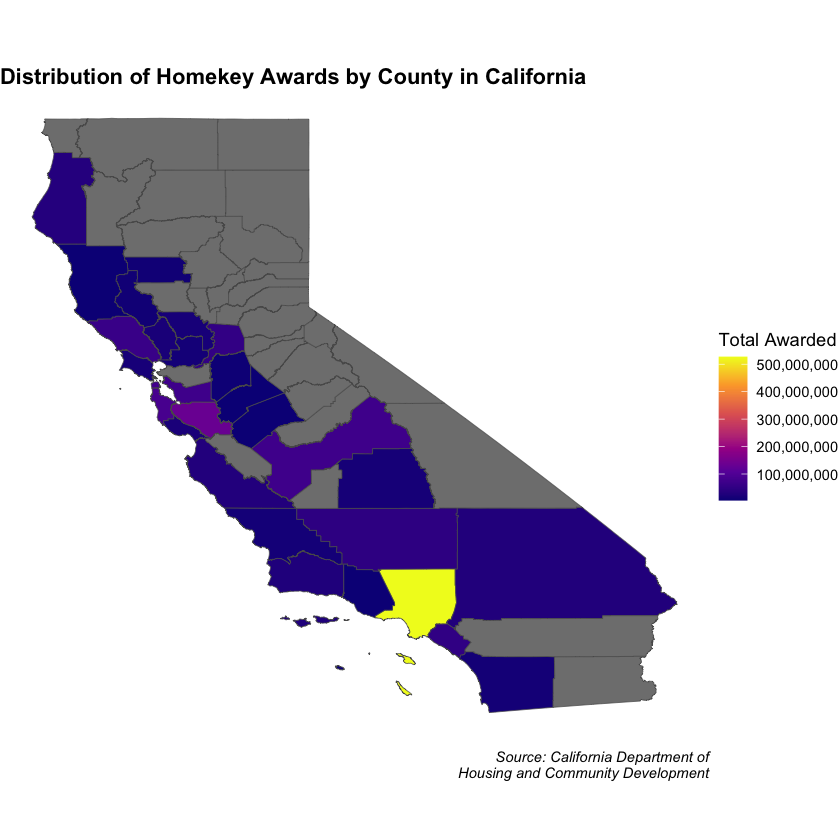

In [510]:
homekey_distribution= county_totals_map |>
ggplot()+
geom_sf(aes(fill=Total_Awarded, geometry= geometry)) +
scale_fill_viridis_c(option = "plasma", name = "Total Awarded",labels = scales::comma) +
  labs(title = "Distribution of Homekey Awards by County in California",
       caption = "Source: California Department of
Housing and Community Development") + 
  theme_void() +
theme(
    plot.title= element_text(face="bold"),
    plot.caption=element_text(face="italic"))
homekey_distribution

## To be able to better interact with the data I used the Plotly package to make the graph interactive. 

In [236]:
install.packages("plotly")
library(plotly)
ggplotly(homekey_distribution)

Installing package into ‘/Users/yasnarahmani/Library/R/arm64/4.4/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/vj/5tw7c0jn7q7fh1p2sp9gn65m0000gn/T//Rtmpxau0kO/downloaded_packages



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




HTML widgets cannot be represented in plain text (need html)

# Analyzing Homelessness Count Data 
#### The data set below is from an Analysis of unaudited data obtained from the United States Department of Housing and Urban Development (HUD) and the United States Census Bureau for the State of California. To access it, I use the rvest package to mine the data. 


In [120]:
install.packages("rvest")

Installing package into ‘/Users/yasnarahmani/Library/R/arm64/4.4/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/vj/5tw7c0jn7q7fh1p2sp9gn65m0000gn/T//Rtmpxau0kO/downloaded_packages


In [126]:
library(rvest)
url= "https://information.auditor.ca.gov/reports/2020-112/accessible/statewide-homeless-accessible.html"
page= read_html(url)
tables= html_table(page)
unhoused_data=tables[[1]]

In [143]:
unhoused_data|>
colnames()= c("County", "Year", "Sheltered_count", "Unsheltered_count", "Total_homeless")


In [511]:
unique(unhoused_data) #checking to see if each year in the data contains the same amount of counties
132/3 

County                                     Year Sheltered_count
1   San José/Santa Clara City & County CoC     2017 1,946          
2   San José/Santa Clara City & County CoC     2018 1,806          
3   San José/Santa Clara City & County CoC     2019 1,784          
4   San Francisco CoC                          2017 2,505          
5   San Francisco CoC                          2018 2,504          
6   San Francisco CoC                          2019 2,855          
7   Oakland, Berkeley/Alameda County CoC       2017 1,766          
8   Oakland, Berkeley/Alameda County CoC       2018 1,633          
9   Oakland, Berkeley/Alameda County CoC       2019 1,710          
10  Sacramento City & County CoC               2017 1,613          
11  Sacramento City & County CoC               2018 1,569          
12  Sacramento City & County CoC               2019 1,661          
13  Santa Rosa, Petaluma/Sonoma County CoC     2017 988            
14  Santa Rosa, Petaluma/Sonoma County CoC     2018 1,067          
15  Santa Rosa, Petaluma/Sonoma County CoC     2019 994            
16  Richmond/Contra Costa County CoC           2017 696            
17  Richmond/Contra Costa County CoC           2018 697            
18  Richmond/Contra Costa County CoC           2019 668            
19  Salinas/Monterey, San Benito Counties CoC  2017 850            
20  Salinas/Monterey, San Benito Counties CoC  2018 785            
21  Salinas/Monterey, San Benito Counties CoC  2019 706            
22  Marin County CoC                           2017 409            
23  Marin County CoC                           2018 387            
24  Marin County CoC                           2019 326            
25  Watsonville/Santa Cruz City & County CoC   2017 450            
26  Watsonville/Santa Cruz City & County CoC   2018 521            
27  Watsonville/Santa Cruz City & County CoC   2019 467            
28  Mendocino County CoC                       2017 160            
29  Mendocino County CoC                       2018 157            
30  Mendocino County CoC                       2019 247            
⋮   ⋮                                          ⋮    ⋮              
103 Santa Maria/Santa Barbara County CoC       2017 967            
104 Santa Maria/Santa Barbara County CoC       2018 813            
105 Santa Maria/Santa Barbara County CoC       2019 670            
106 Bakersfield/Kern County CoC                2017 541            
107 Bakersfield/Kern County CoC                2018 515            
108 Bakersfield/Kern County CoC                2019 525            
109 Long Beach CoC                             2017 655            
110 Long Beach CoC                             2018 665            
111 Long Beach CoC                             2019 619            
112 Pasadena CoC                               2017 228            
113 Pasadena CoC                               2018 215            
114 Pasadena CoC                               2019 221            
115 Riverside City & County CoC                2017 768            
116 Riverside City & County CoC                2018 631            
117 Riverside City & County CoC                2019 766            
118 San Bernardino City & County CoC           2017 687            
119 San Bernardino City & County CoC           2018 675            
120 San Bernardino City & County CoC           2019 687            
121 Oxnard, San Buenaventura/Ventura County Co 2017 488            
122 Oxnard, San Buenaventura/Ventura County Co 2018 478            
123 Oxnard, San Buenaventura/Ventura County Co 2019 411            
124 Glendale CoC                               2017 111            
125 Glendale CoC                               2018 104            
126 Glendale CoC                               2019 96             
127 Imperial County CoC                        2017 128            
128 Imperial County CoC                        2018 160            
129 Imperial County CoC                        2019 188     

[1] 44

## To be able to merge the data I standardized the county names to match the award table I created.

In [160]:
homelessness_2019=filter(unhoused_data, Year==2019)
county_names=homelessness_2019$County
county_names

[1] "San José/Santa Clara City & County CoC"                                         
 [2] "San Francisco CoC"                                                              
 [3] "Oakland, Berkeley/Alameda County CoC"                                           
 [4] "Sacramento City & County CoC"                                                   
 [5] "Santa Rosa, Petaluma/Sonoma County CoC"                                         
 [6] "Richmond/Contra Costa County CoC"                                               
 [7] "Salinas/Monterey, San Benito Counties CoC"                                      
 [8] "Marin County CoC"                                                               
 [9] "Watsonville/Santa Cruz City & County CoC"                                       
[10] "Mendocino County CoC"                                                           
[11] "Turlock, Modesto/Stanislaus County CoC"                                         
[12] "Stockton/San Joaquin County CoC"                                                
[13] "Daly City/San Mateo County CoC"                                                 
[14] "Visalia/Kings, Tulare Counties CoC"                                             
[15] "Fresno City & County/Madera County CoC"                                         
[16] "Roseville, Rocklin/Placer County CoC"                                           
[17] "Redding/Shasta, Siskiyou, Lassen, Plumas, Del Norte, Modoc, Sierra Counties CoC"
[18] "Napa City & County CoC"                                                         
[19] "Vallejo/Solano County CoC"                                                      
[20] "Chico, Paradise/Butte County CoC"                                               
[21] "Merced City & County CoC"                                                       
[22] "Davis, Woodland/Yolo County CoC"                                                
[23] "Humboldt County CoC"                                                            
[24] "Colusa, Glenn, Trinity Counties CoC"                                            
[25] "Yuba City & County/Sutter County CoC"                                           
[26] "El Dorado County CoC"                                                           
[27] "Tuolumne, Amador, Calaveras, Mariposa Counties CoC"                             
[28] "Tehama County CoC"                                                              
[29] "Lake County CoC"                                                                
[30] "Alpine, Inyo, Mono Counties CoC"                                                
[31] "Nevada County CoC"                                                              
[32] "Los Angeles City & County CoC"                                                  
[33] "San Diego City and County CoC"                                                  
[34] "Santa Ana, Anaheim/Orange County CoC"                                           
[35] "Santa Maria/Santa Barbara County CoC"                                           
[36] "Bakersfield/Kern County CoC"                                                    
[37] "Long Beach CoC"                                                                 
[38] "Pasadena CoC"                                                                   
[39] "Riverside City & County CoC"                                                    
[40] "San Bernardino City & County CoC"                                               
[41] "Oxnard, San Buenaventura/Ventura County Co"                                     
[42] "Glendale CoC"                                                                   
[43] "Imperial County CoC"                                                            
[44] "San Luis Obispo County CoC"

In [178]:
good_countynames= county_totals_map$County
good_countynames
    

[1] "Alameda County"         "Fresno County"          "Glenn County"          
 [4] "Humboldt County"        "Kern County"            "Lake County"           
 [7] "Los Angeles County"     "Marin County"           "Mendocino County"      
[10] "Merced County"          "Monterey County"        "Napa County"           
[13] "Orange County"          "Sacramento County"      "San Bernardino County" 
[16] "San Diego County"       "San Francisco County"   "San Joaquin County"    
[19] "San Luis Obispo County" "San Mateo County"       "Santa Barbara County"  
[22] "Santa Clara County"     "Santa Cruz County"      "Solano County"         
[25] "Sonoma County"          "Stanislaus County"      "Tulare County"         
[28] "Ventura County"         "Yolo County"            "Del Norte County"      
[31] "Plumas County"          "Sutter County"          "Amador County"         
[34] "Shasta County"          "Imperial County"        "Riverside County"      
[37] "Mono County"            "Siskiyou County"        "Madera County"         
[40] "Tehama County"          "Yuba County"            "Mariposa County"       
[43] "Sierra County"          "El Dorado County"       "Butte County"          
[46] "Tuolumne County"        "Colusa County"          "Contra Costa County"   
[49] "Nevada County"          "San Benito County"      "Calaveras County"      
[52] "Inyo County"            "Placer County"          "Lassen County"         
[55] "Trinity County"         "Kings County"           "Alpine County"         
[58] "Modoc County"

In [512]:
clean_county_names = function(county_vector) {
  county_vector %>%
    str_remove(pattern= "CoC") |>
    str_remove(pattern=".*/") |>
    str_remove(pattern= "City") |>
    str_remove(pattern="&") |>
    str_remove(pattern=".*,") |>
    str_replace_all(pattern="Counties", replacement="County") |>
    str_trim() %>%                          # Remove leading/trailing spaces
    str_replace_all("\\s{2,}", " ") %>%     # Replace multiple spaces with a single space
    str_replace_all(" and.*", "") %>%       # Remove "and County" if present
    str_replace_all(" Co$", " County") %>%  # Standardize "Co" to "County"
    str_to_title()                          # Convert to title case for consistency
}
   

In [514]:
#Cleaning the outliers
newvec=clean_county_names(almost_cleaned)
newvec[2]="San Francisco County"
newvec[41]="Ventura County"

In [190]:
Cleaned_unhoused_2019=homelessness_2019|>
mutate("County"= newvec)


## Now we can visualize the homeless population in California, one year before the first Homekey Program was implemented (2020) 
### This will give us some insight into if the award funding was distributed porportional to need. 

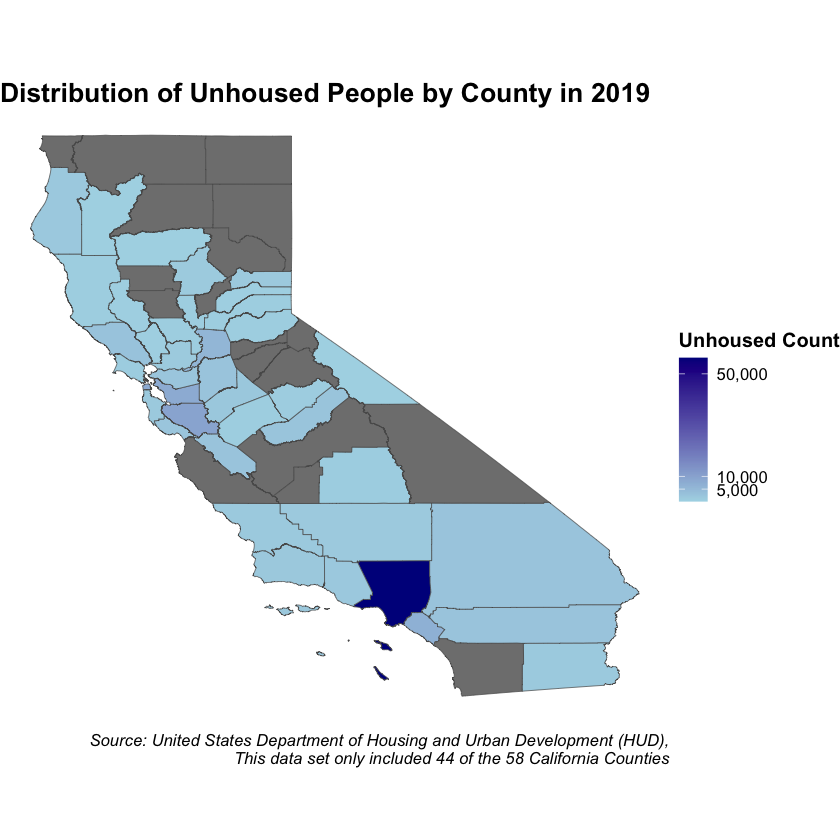

In [517]:
library(scales)
unhoused_map = unhoused_map |> 
  mutate(Total_homeless = as.numeric(gsub(",", "", Total_homeless)))  


distribution_unhoused_2019=unhoused_map |>
  ggplot() +
  geom_sf(aes(fill = Total_homeless, geometry = geometry)) +
  scale_fill_gradient(
    low = "lightblue",
    high = "darkblue",
    name = "Unhoused Count",
    labels = comma, 
    breaks = c(5000, 10000, 50000)
  ) +
  labs(
    title = "Distribution of Unhoused People by County in 2019",
    caption = "Source: United States Department of Housing and Urban Development (HUD),\nThis data set only included 44 of the 58 California Counties"
  ) +
  theme_void() + 
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    plot.caption = element_text(size = 10, face = "italic"), 
    legend.title = element_text(size = 12, face = "bold"), 
    legend.text = element_text(size = 10) 
  )
distribution_unhoused_2019

In [222]:
unhoused_map


County                 Year Sheltered_count Unsheltered_count Total_homeless
1  Santa Clara County     2019 1,784           7,922             9,706         
2  San Francisco County   2019 2,855           5,180             8,035         
3  Alameda County         2019 1,710           6,312             8,022         
4  Sacramento County      2019 1,661           3,900             5,561         
5  Sonoma County          2019 994             1,957             2,951         
6  Contra Costa County    2019 668             1,627             2,295         
7  San Benito County      2019 706             1,998             2,704         
8  Marin County           2019 326             708               1,034         
9  Santa Cruz County      2019 467             1,700             2,167         
10 Mendocino County       2019 247             538               785           
11 Stanislaus County      2019 835             1,088             1,923         
12 San Joaquin County     2019 1,073           1,558             2,631         
13 San Mateo County       2019 611             901               1,512         
14 Tulare County          2019 289             775               1,064         
15 Madera County          2019 439             2,069             2,508         
16 Placer County          2019 321             296               617           
17 Sierra County          2019 543             806               1,349         
18 Napa County            2019 172             150               322           
19 Solano County          2019 219             932               1,151         
20 Butte County           2019 428             838               1,266         
21 Merced County          2019 320             288               608           
22 Yolo County            2019 258             397               655           
23 Humboldt County        2019 300             1,402             1,702         
24 Trinity County         2019 42              150               192           
25 Sutter County          2019 202             519               721           
26 El Dorado County       2019 133             480               613           
27 Mariposa County        2019 158             687               845           
28 Tehama County          2019 73              215               288           
29 Lake County            2019 26              382               408           
30 Mono County            2019 17              197               214           
31 Nevada County          2019 164             251               415           
32 Los Angeles County     2019 13,786          42,471            56,257        
33 Orange County          2019 2,899           3,961             6,860         
34 Santa Barbara County   2019 670             1,133             1,803         
35 Kern County            2019 525             805               1,330         
36 Riverside County       2019 766             2,045             2,811         
37 San Bernardino County  2019 687             1,920             2,607         
38 Ventura County         2019 411             1,258             1,669         
39 Imperial County        2019 188             1,225             1,413         
40 San Luis Obispo County 2019 311             1,172             1,483         
41 Del Norte County         NA NA              NA                NA            
42 Plumas County            NA NA              NA                NA            
43 Glenn County             NA NA              NA                NA            
44 Amador County            NA NA              NA                NA            
45 Shasta County            NA NA              NA                NA            
46 Siskiyou County          NA NA              NA                NA            
47 Yuba County              NA NA              NA                NA            
48 San Diego County         NA NA              NA                NA            
49 Tuolumne County          NA NA              NA                NA            
50 

# Accessing and cleaning homelessness count data in the years following the Homekey Program 

In [251]:
install.packages("readxl")
library(readxl)
file_path <- "2007-2024-PIT-Counts-by-CoC.xlsx"
data_2024 <- read_excel(file_path)


Installing package into ‘/Users/yasnarahmani/Library/R/arm64/4.4/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/vj/5tw7c0jn7q7fh1p2sp9gn65m0000gn/T//Rtmpxau0kO/downloaded_packages


In [459]:
#reading the necessary excel sheets 

data_2023=read_excel(file_path, sheet=2)
data_2022=read_excel(file_path, sheet=3)
data_2021=read_excel(file_path, sheet=4)
data_2020=read_excel(file_path, sheet=5)

#selecting columns needed and creating Year column 
cleaned_2024=data_2024[c(1,2,5)] |>
mutate("Year"= 2024)
cleaned_2023=
data_2023[c(1,2,4)] |>
mutate("Year"= 2023)
cleaned_2022=data_2022[c(1,2,4)]|>
mutate("Year"= 2022)
cleaned_2021=data_2021[c(1,2,4)] |>
mutate("Year"= 2021)
cleaned_2020=data_2020[c(1,2,4)] |>
mutate("Year"= 2020)
#binding tables together 

all_tables=rbind(cleaned_2023,cleaned_2022,cleaned_2021,cleaned_2020,cleaned_2024)
colnames(all_tables)=c("CoC_Name", "County", "Overal_Homeless","Year")
colnames(all_tables)


[1] "CoC_Name"        "County"          "Overal_Homeless" "Year"

In [460]:
California_rates_2020_2024=all_tables[grepl("ca", all_tables$CoC_Name, ignore.case = TRUE),]
colnames(California_rates_2020_2024)=c("CoC_Name", "County", "Overall_Homeless","Year")

In [479]:
#Cleaning the county names to match other tables 
cleaned_counties=clean_county_names(California_rates_2020_2024$County)
California_rates_2020_2024_clean=California_rates_2020_2024 |>
mutate("County"=cleaned_counties)
without_LA=California_rates_2020_2024_clean |>
filter(County!= "Los Angeles County")


In [463]:
Combined_LA=California_rates_2020_2024_clean |> 
  mutate(County = ifelse(County %in% c("Pasadena", "Long Beach", "Glendale"), "Los Angeles County", County))
Combined_LA[2,2]="San Francisco County"

In [464]:
Total_cleaned_county_Names=Combined_LA$County |>
 str_replace_all(pattern="San Francisco", replacement=" San Francisco County") |>
 str_replace_all(pattern="San Diego", replacement=" San Diego County") |>
 str_replace_all(pattern="San Francisco County County", replacement=" San Francisco County") 

In [462]:
California_rates_2020_2024_clean

CoC_Name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1   CA-500                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
2   CA-501                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
3   CA-502                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
4   CA-503                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
5   CA-504                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
6 

## Exploring the homelessness trends in counties based on different funding amounts 

In [518]:
cleaned_award_data=award_data |>
select("Total_Awarded_Amount", "Award_Date", "County") 

In [484]:
Merged_totals_and_first_year = cleaned_award_data |>
  left_join(California_rates_2020_2023_clean, by = "County", relationship = "many-to-many") |> 
  group_by(County) |> 
  summarize(
    Total_awards = sum(Total_Awarded_Amount, na.rm = TRUE),
    First_Award_Date = min(as.Date(Award_Date, "%Y-%m-%d")),
    .groups = "drop"
  )
Merged_totals_and_first_year |>
arrange(First_Award_Date)

County                 Total_awards First_Award_Date
1  Kern County             184593500   2021-12-15      
2  San Bernardino County   112016232   2021-12-15      
3  San Mateo County        339246836   2021-12-15      
4  Sacramento County       211739792   2021-12-21      
5  San Francisco County     78795080   2021-12-21      
6  Sonoma County           248235836   2021-12-21      
7  Santa Barbara County    101415176   2022-01-04      
8  Santa Clara County      532524004   2022-01-04      
9  Los Angeles County     2107298476   2022-01-18      
10 Marin County             61988800   2022-02-09      
11 Monterey County          29616449   2022-02-16      
12 Napa County              72454400   2022-02-16      
13 Orange County           198430236   2022-02-16      
14 Ventura County           16919200   2022-02-16      
15 Alameda County          283275092   2022-03-01      
16 Yolo County              63081868   2022-03-01      
17 Lake County              34141028   2022-03-14      
18 Merced County            17680000   2022-03-14      
19 Tulare County            58096000   2022-03-14      
20 Glenn County              8756945   2022-03-28      
21 Humboldt County         129398304   2022-03-28      
22 Stanislaus County        15893412   2022-03-28      
23 Santa Cruz County        77300000   2022-04-25      
24 Fresno County            71296449   2022-05-09      
25 San Joaquin County       26281120   2022-05-09      
26 Solano County            48367464   2022-05-09      
27 San Luis Obispo County   48670516   2022-07-06      
28 San Diego County         11825000   2022-07-28      
29 Mendocino County         18256496   2022-10-26

In [526]:
#finding key counties for deeper analysis, which counties received the most awards? Does higher funding correlate to better results? 
#Did the counties that received the most funding ("Key Counties") see any drops in homelessness? 
highest_Awards_reciepients= Merged_totals_and_first_year  |>
arrange(desc(Total_awards))
highest_Awards_10= highest_Awards_reciepeints |>
slice_head(n=10)
Lowest_Awards_10= Merged_totals_and_first_year|>
arrange(Total_awards) |>
slice_head(n=10)
Lowest_Awards_10
highest_Awards_10

County             Total_awards First_Award_Date
1  Glenn County        8756945     2022-03-28      
2  San Diego County   11825000     2022-07-28      
3  Stanislaus County  15893412     2022-03-28      
4  Ventura County     16919200     2022-02-16      
5  Merced County      17680000     2022-03-14      
6  Mendocino County   18256496     2022-10-26      
7  San Joaquin County 26281120     2022-05-09      
8  Monterey County    29616449     2022-02-16      
9  Lake County        34141028     2022-03-14      
10 Solano County      48367464     2022-05-09

County                Total_awards First_Award_Date
1  Los Angeles County    2107298476   2022-01-18      
2  Santa Clara County     532524004   2022-01-04      
3  San Mateo County       339246836   2021-12-15      
4  Alameda County         283275092   2022-03-01      
5  Sonoma County          248235836   2021-12-21      
6  Sacramento County      211739792   2021-12-21      
7  Orange County          198430236   2022-02-16      
8  Kern County            184593500   2021-12-15      
9  Humboldt County        129398304   2022-03-28      
10 San Bernardino County  112016232   2021-12-15

## Visualizing homelessness trends for the counties that recieved the least funding

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_line()`).”


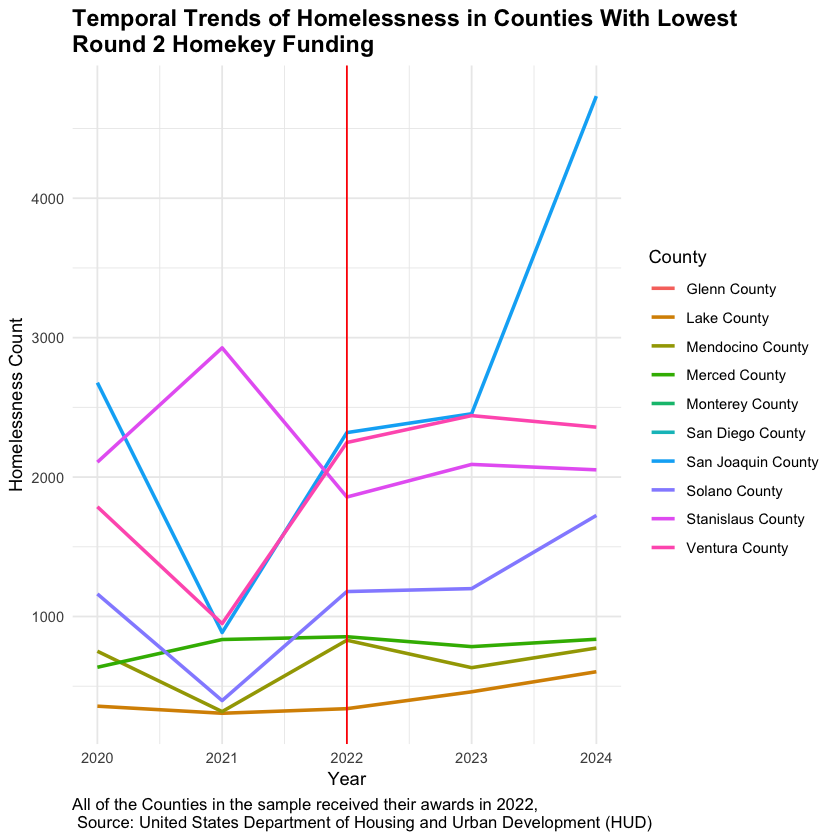

In [560]:
Lowest_merged = left_join(Lowest_Awards_10, cleaned_County_Homelessness, by = "County")

ggplot(Lowest_merged, aes(x = Year, y = Overall_Homeless, color = County, group = County)) +
  geom_line(size = 1) +
  geom_vline(xintercept = 2022, color = "red") +
  labs(
    title = "Temporal Trends of Homelessness in Counties With Lowest \nRound 2 Homekey Funding",
    caption = "All of the Counties in the sample received their awards in 2022,\n Source: United States Department of Housing and Urban Development (HUD)",
    x = "Year",
    y = "Homelessness Count",
    color = "County"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14), 
    plot.caption = element_text(size = 10, hjust = 0)   
  )


## Visualizing homelessness trends for the counties that recieved the most funding

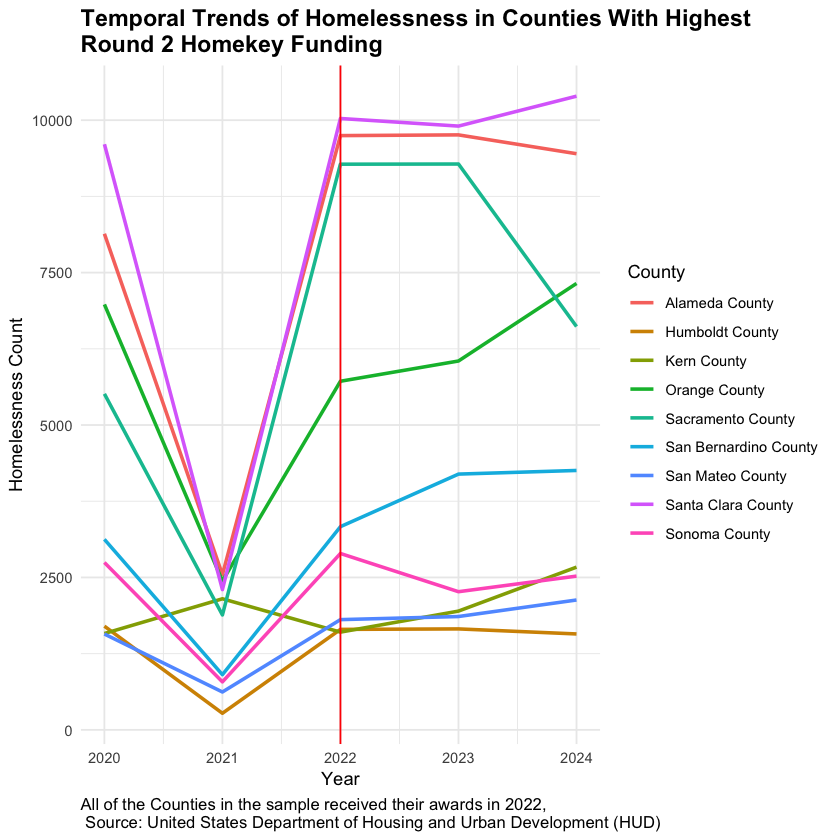

In [561]:
Highest_merged = left_join(highest_Awards_10, cleaned_County_Homelessness, by = "County") |>
  filter(County!="Los Angeles County") |>
  group_by(County, Year) |>
  summarize(
    Total_homelessness_count = sum(Overall_Homeless, na.rm = TRUE),
    .groups = "drop"  
  )

ggplot(Highest_merged, aes(x = Year, y = Total_homelessness_count, color = County, group = County)) +
  geom_line(size = 1) +
  geom_vline(xintercept = 2022, color = "red") + #majority of the awards in the sample were given in 2022
  labs(
    title = "Temporal Trends of Homelessness in Counties With Highest \nRound 2 Homekey Funding",
    caption = "All of the Counties in the sample received their awards in 2022,\n Source: United States Department of Housing and Urban Development (HUD)",
    x = "Year",
    y = "Homelessness Count",
    color = "County"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),  
    plot.caption = element_text(size = 10, hjust = 0)    
  )


# Using Scatter Plots to explore trends relating to Award Timing and Intensity

`geom_smooth()` using formula = 'y ~ x'


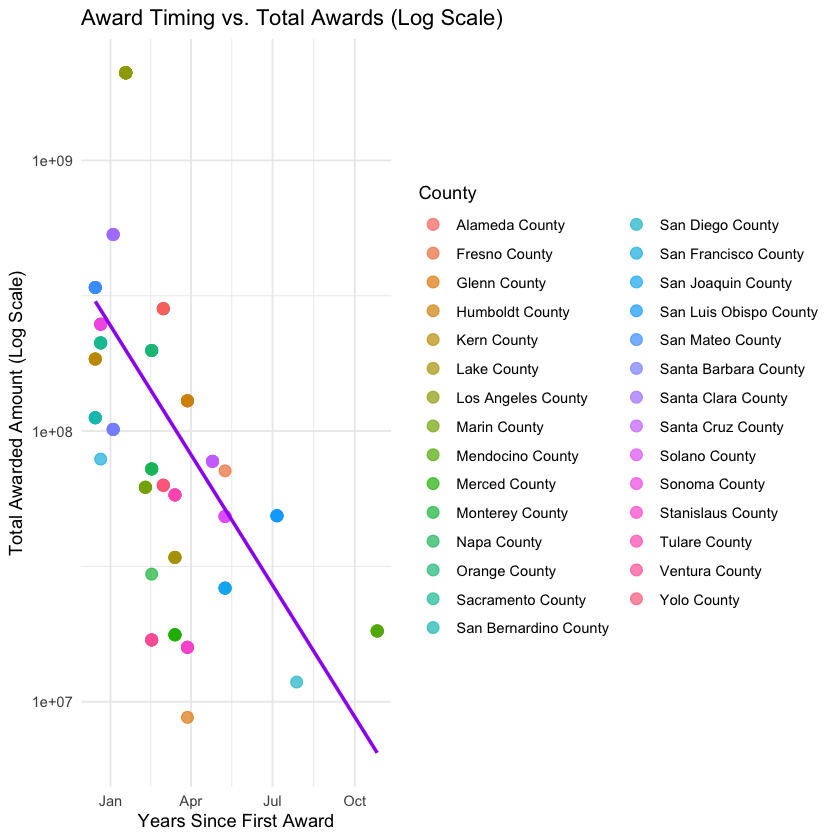

In [564]:
merged_data = left_join(Merged_totals_and_first_year, cleaned_County_Homelessness, by = "County") 

ggplot(merged_data, aes(x = First_Award_Date, y = Total_awards, color= County)) + 
  geom_point(size = 3, alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, color = "purple") +
  scale_y_log10() + 
  labs(
    title = "Award Timing vs. Total Awards (Log Scale)",
    x = "Years Since First Award",
    y = "Total Awarded Amount (Log Scale)",
    color = "County"
  ) +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


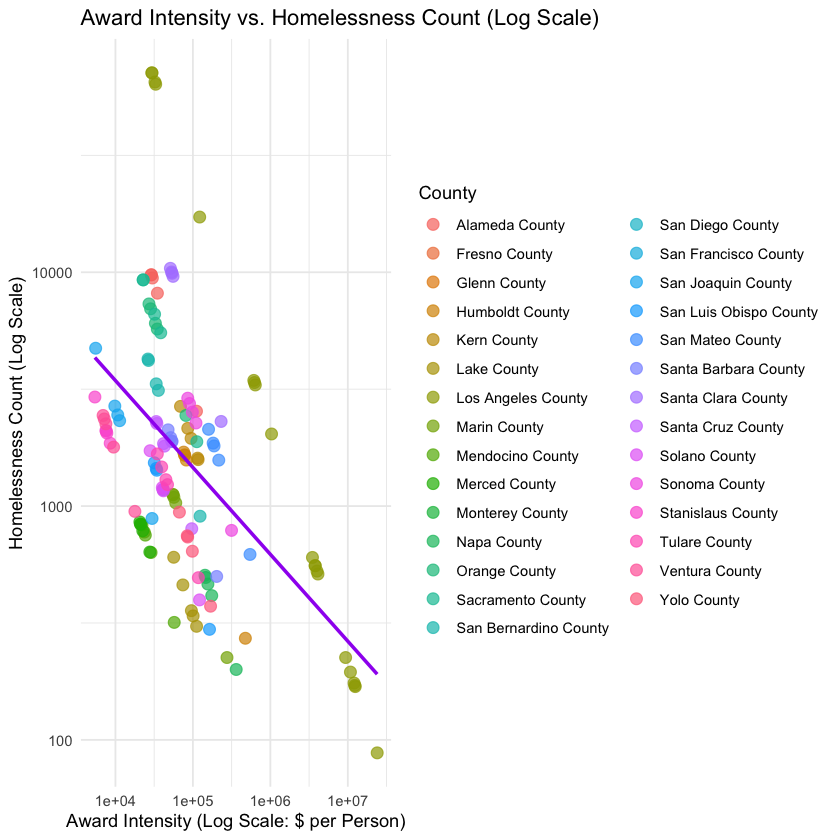

In [563]:
merged_data2 = left_join(Merged_totals_and_first_year, cleaned_County_Homelessness, by = "County") |>
  mutate(Award_Intensity = Total_awards / Overall_Homeless)

ggplot(merged_data2, aes(x = Award_Intensity, y = Overall_Homeless, color = County)) +
  geom_point(size = 3, alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, color = "purple") +
  scale_x_log10() +  
  scale_y_log10() +  
  labs(
    title = "Award Intensity vs. Homelessness Count (Log Scale)",
    x = "Award Intensity (Log Scale: $ per Person)",
    y = "Homelessness Count (Log Scale)",
    color = "County"
  ) +
  theme_minimal()